<a href="https://colab.research.google.com/github/AngelValdez63/ModeloPredictivo/blob/main/modelo_de_prediccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Crear modelo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import pickle

# ✅ Cargar los datos
data = pd.read_excel('Dataset.xlsx')

# Separar características (X) y etiquetas (y)
X = data[['Longitud', 'Largo', 'Ancho', 'Peso']]
y = data['Mes']

# ✅ Convertir los meses a categorías (etiquetas enteras)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convierte a valores enteros

# Aplicar one-hot encoding para clasificación multiclase
y_categorical = to_categorical(y_encoded)

# ✅ Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ Guardar el scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# ✅ Crear el modelo con Dropout
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))  #  Desactiva el 30% de las neuronas durante el entrenamiento
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))

# Compilar el modelo con categorial_crossentropy
optimizer = Adam(learning_rate=0.0005)  # Tasa más baja para un entrenamiento más preciso
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#  Entrenar el modelo
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Pérdida en test: {loss}, Precisión: {accuracy}')

#  Guardar el LabelEncoder después del entrenamiento
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

#  Hacer predicciones
entrada = np.array([[8.5, 1.3, 3.3, 7.5]])  # Longitud, Largo, Ancho, Peso
entrada_scaled = scaler.transform(entrada)

# Predecir la clase
prediccion = model.predict(entrada_scaled)

# Obtener el índice de la clase predicha
mes_index = np.argmax(prediccion)
mes_predicho = label_encoder.inverse_transform([mes_index])[0]

print(f'El mes predicho es: {mes_predicho}')

# ✅ Guardar el modelo
model.save('modelo_clasificacion_mes.keras')



Epoch 1/1000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - accuracy: 0.3436 - loss: 1.6522 - val_accuracy: 0.3448 - val_loss: 1.5851
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2811 - loss: 1.6164 - val_accuracy: 0.3793 - val_loss: 1.5593
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3166 - loss: 1.6196 - val_accuracy: 0.3793 - val_loss: 1.5361
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.2735 - loss: 1.5812 - val_accuracy: 0.3793 - val_loss: 1.5130
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.4517 - loss: 1.4770 - val_accuracy: 0.3793 - val_loss: 1.4907
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.3409 - loss: 1.5849 - val_accuracy: 0.3793 - val_loss: 1.4695
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.3843 - loss: 1.4988 - val_accuracy: 0.3793 - val_loss: 1.4486
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.3384 - loss: 1.4921 - val_accuracy: 0.3793 - val_loss: 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
El mes predicho es: 1


Probar modelo

In [ ]:
import pandas as pd
import numpy as np
from keras.models import load_model
from sklearn.preprocessing import StandardScaler
import pickle

#  1. Cargar el modelo de clasificación
model = load_model('modelo_clasificacion_mes.keras')

#  2. Cargar el scaler usado durante el entrenamiento
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

#  3. Cargar el LabelEncoder para decodificar la clase
with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

#  4. Definir la entrada (dimensiones del ostión)
entrada = pd.DataFrame({'Longitud': [45.82], 'Largo': [77.92], 'Ancho': [25.14], 'Peso': [42.3]})

# Normalizar la entrada
entrada_scaled = scaler.transform(entrada)

#  5. Hacer la predicción
prediccion = model.predict(entrada_scaled)

# Obtener la clase con la mayor probabilidad
mes_index = np.argmax(prediccion)

# Convertir el índice a la etiqueta original (mes)
mes_predicho = label_encoder.inverse_transform([mes_index])[0]

# 6. Mostrar la predicción
if(mes_predicho == 6):
    mes_predicho = 'Enero'
elif(mes_predicho == 5):
    mes_predicho = 'Diciembre'
elif(mes_predicho == 4):
    mes_predicho = 'Noviembre'
elif(mes_predicho == 3):
    mes_predicho = 'Octubre'
elif(mes_predicho == 2):
    mes_predicho = 'Septiembre'
elif(mes_predicho == 1):
    mes_predicho = 'Agosto'


print(f'Predicción del mes: {mes_predicho}')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicción del mes: Enero


Análisis Descriptivo por Tipo de Mes:
    Longitud                                                               \
       count       mean       std    min      25%     50%      75%    max   
Mes                                                                         
1       30.0   5.077333  0.742999   3.86   4.5100   5.130   5.6200   6.35   
2       30.0  19.705333  3.546421  12.11  17.7175  19.940  22.0950  25.25   
3       30.0  26.029000  6.171673  13.15  21.2350  26.030  30.5425  36.95   
4       30.0  26.029000  6.171673  13.15  21.2350  26.030  30.5425  36.95   
5       30.0  43.086333  3.708279  35.39  39.8300  43.445  44.9925  49.99   
6       30.0  46.827667  5.975634  33.49  43.6150  47.140  50.1500  59.91   

    Largo             ...    Ancho         Peso                        \
    count       mean  ...      75%    max count       mean        std   
Mes                   ...                                               
1    30.0   5.743000  ...   1.6425   1.87  30.0  

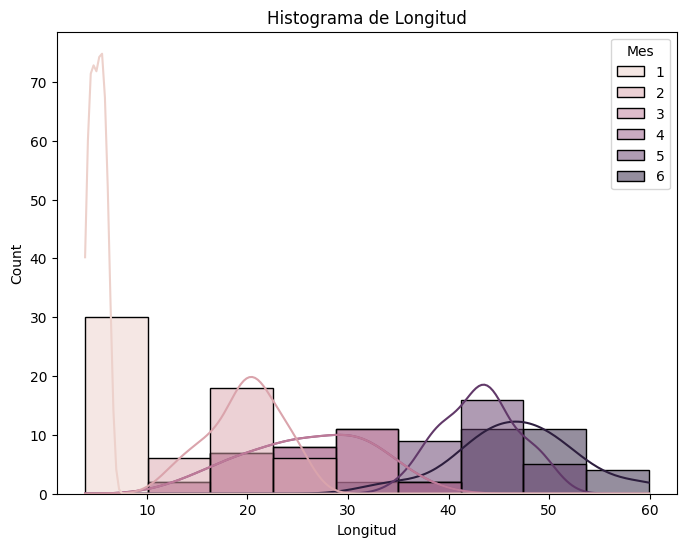

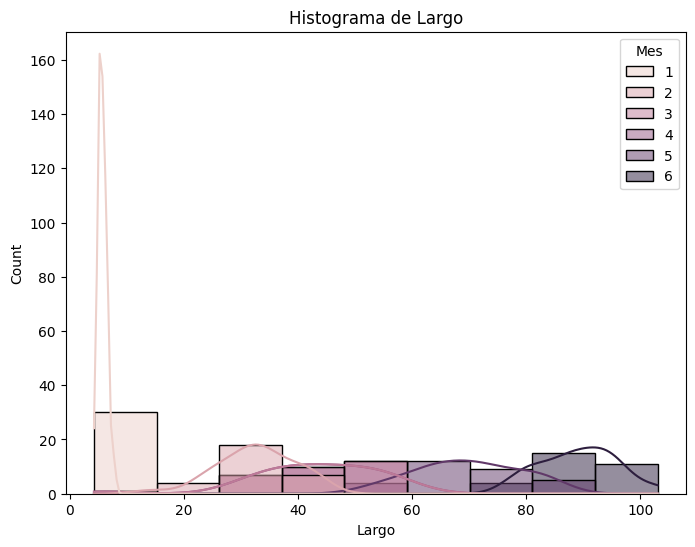

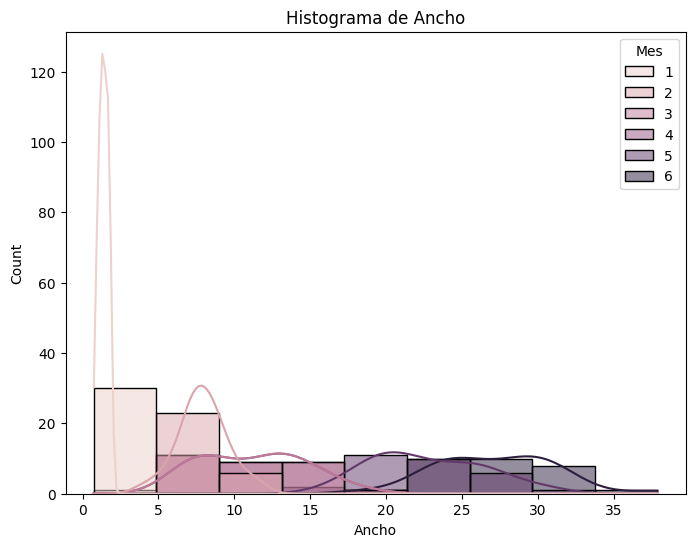

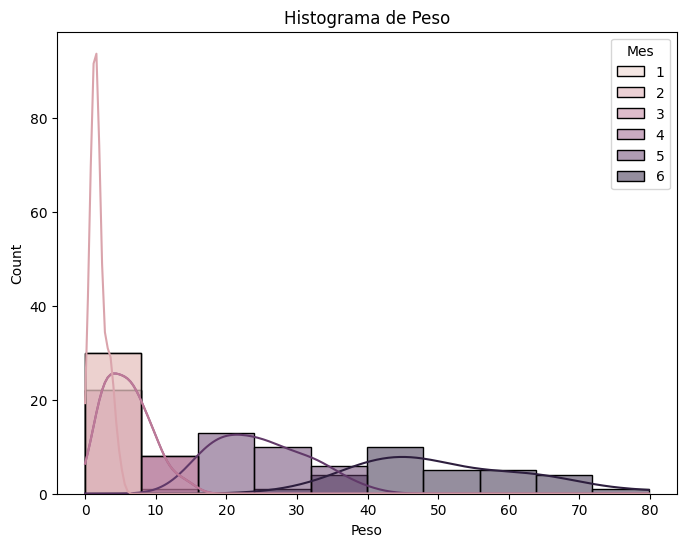

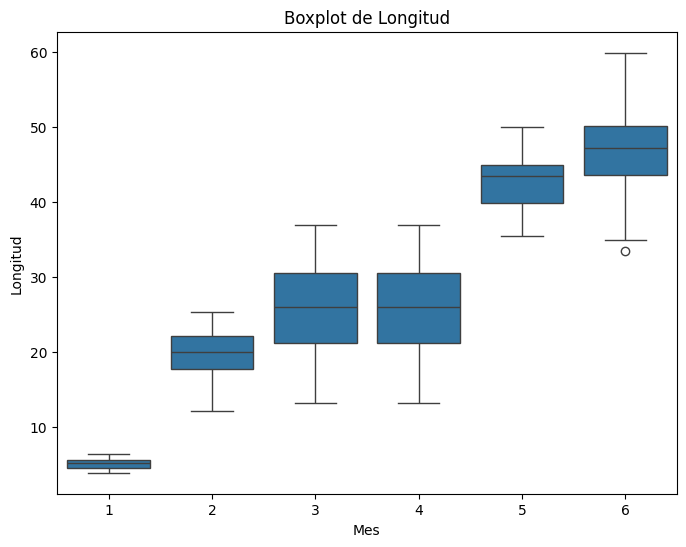

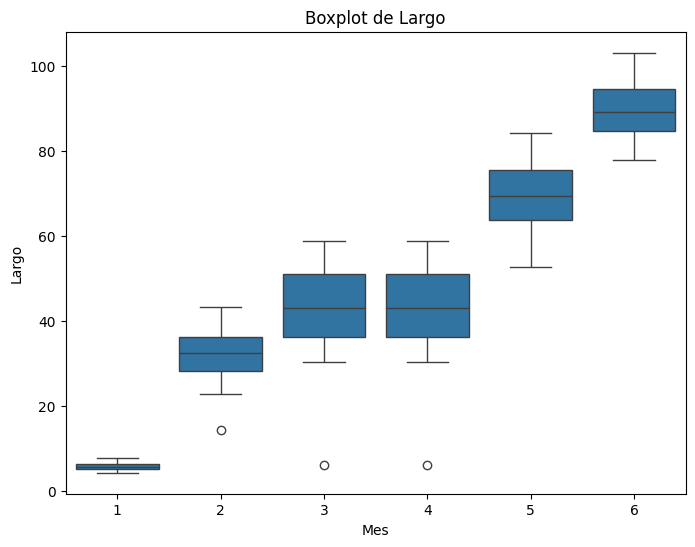

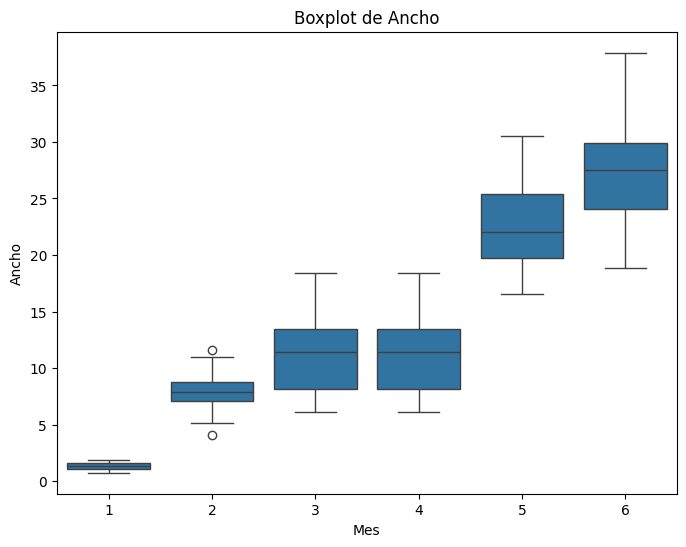

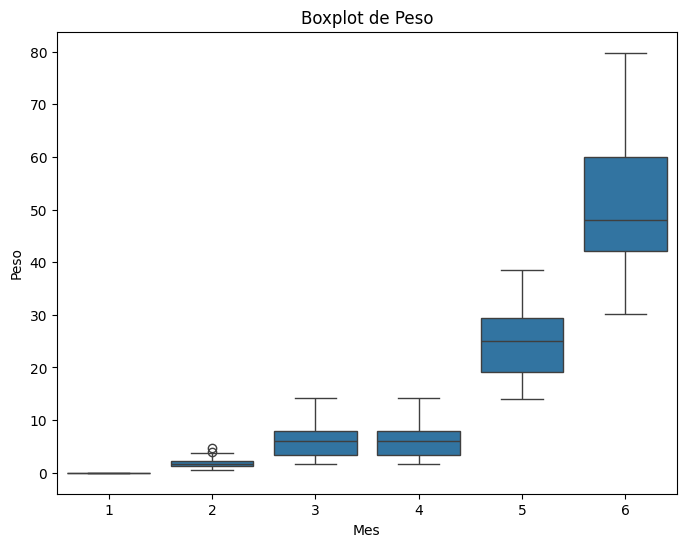

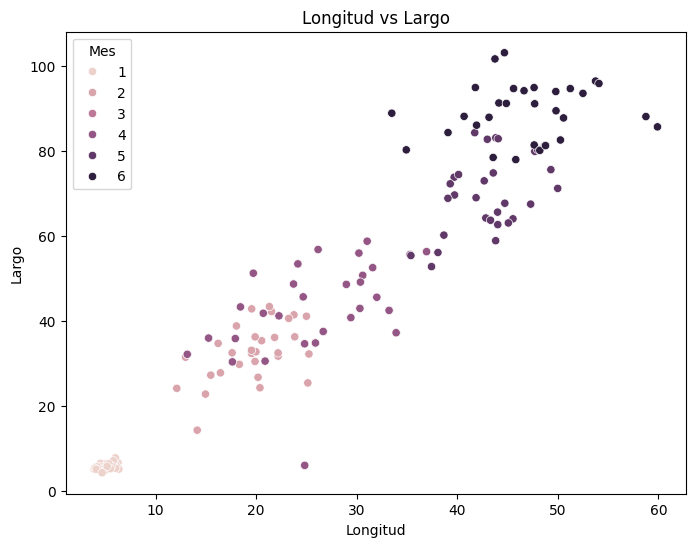

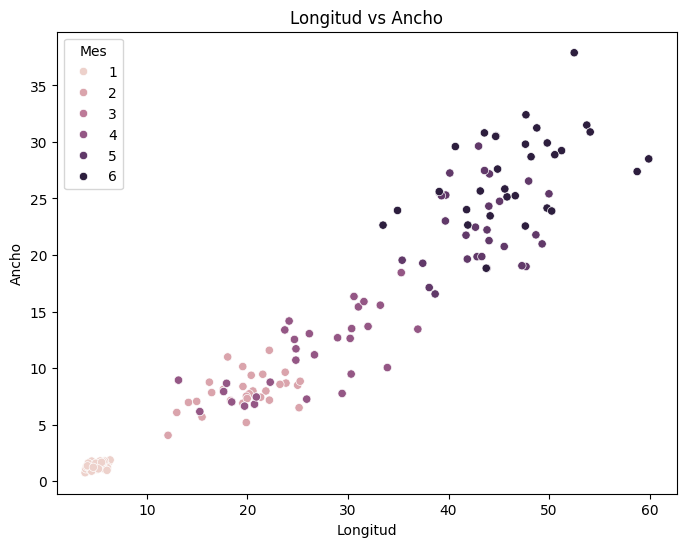

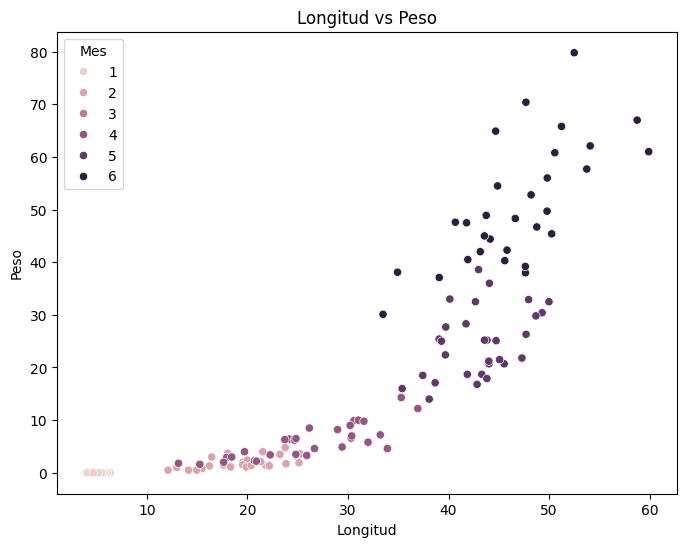

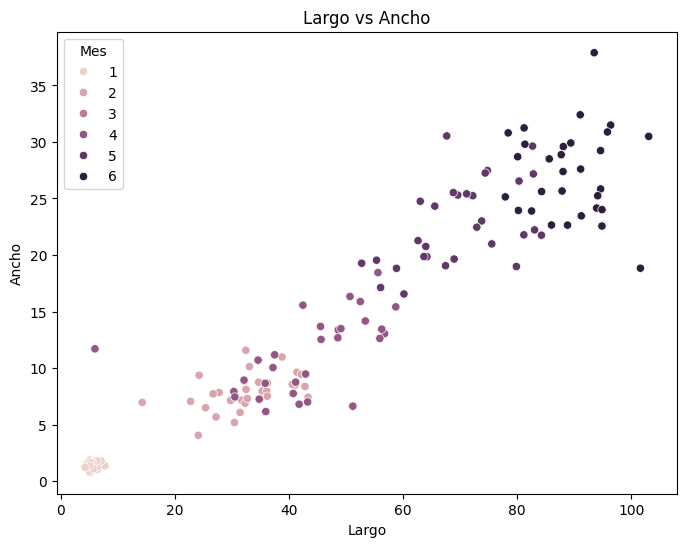

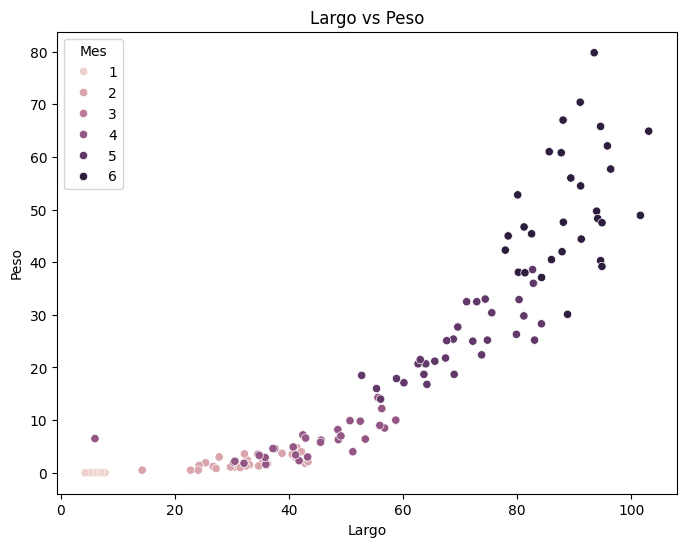

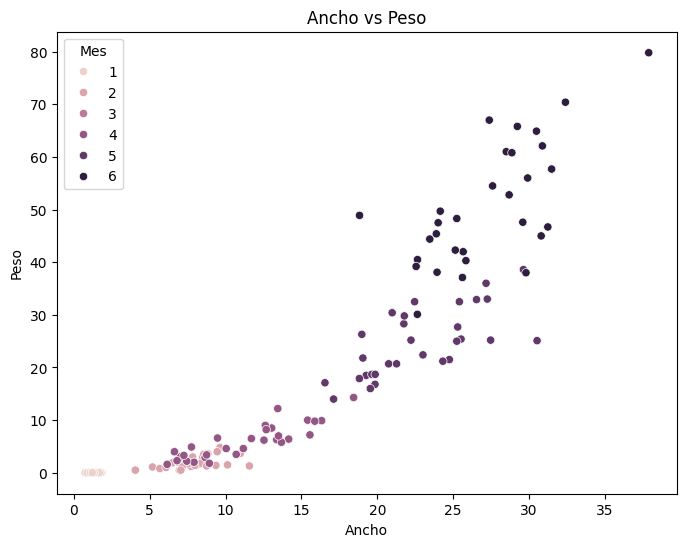

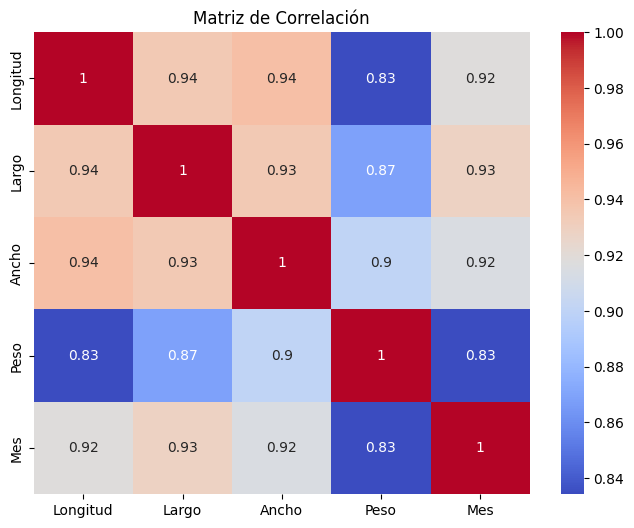

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Probabilidades: [9.9997950e-01 2.2862332e-06 6.1037190e-06 1.6145437e-07 1.2978816e-07
 1.1942128e-05]
El mes predicho es: 1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
import pickle

#  Cargar los datos
data = pd.read_excel('Dataset.xlsx')

#  Análisis Descriptivo
print("Análisis Descriptivo por Tipo de Mes:")
groups = data.groupby('Mes')
print(groups.describe())

#  Histogramas
for column in data.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=column, hue="Mes", kde=True)
    plt.title(f'Histograma de {column}')
    plt.show()

#  Box plots
for column in data.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Mes', y=column, data=data)
    plt.title(f'Boxplot de {column}')
    plt.show()

#  Scatter plots
features = data.columns[:-1]
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=features[i], y=features[j], hue='Mes', data=data)
        plt.title(f'{features[i]} vs {features[j]}')
        plt.show()

#  Correlaciones
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

#  Cargar el modelo
model = load_model('modelo_clasificacion_mes.keras')

#  Cargar el scaler
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

#  Cargar el LabelEncoder para decodificar las clases
with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

# Entrada del usuario
entrada = np.array([[8.5, 1.3, 3.3, 7.5]])  # Longitud, Largo, Ancho, Peso
entrada_scaled = scaler.transform(entrada)  # Normalizar la entrada

#  Hacer la predicción
prediccion = model.predict(entrada_scaled)

#  Obtener la clase con la mayor probabilidad
mes_index = np.argmax(prediccion)  # Índice de la clase con mayor probabilidad
mes_predicho = label_encoder.inverse_transform([mes_index])[0]  # Decodificar la clase

#  Mostrar la predicción
print(f'Probabilidades: {prediccion[0]}')  # Muestra las probabilidades de cada clase
print(f'El mes predicho es: {mes_predicho}')
